<a href="https://colab.research.google.com/github/rubyspch/Colaboratory-Notes/blob/main/time_series1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis.

time series- a set of data points indexed in time order.

here we are working with historical prices of apple stock downloaded from google finance.

Date-time index:

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/aapl.csv", parse_dates=["Date"], index_col="Date")
df.head() 

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [ ]:
type(df.Date) #date column is read auto as string, you add arg 'parse_dates'to read_csv to make them dates

pandas.core.series.Series

In [ ]:
#read_csv adds an index but use index_col to specify the date column as the index
df.index #shows type of index is 'DatetimeIndex'

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
#benefit of it reading index as datetime is that you can specify timestamps for it to show you:
df["2017-03"] #specifies data for march 2017

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-31,143.72,144.27,143.01,143.66,19661651
2017-03-30,144.19,144.50,143.50,143.93,21207252
2017-03-29,143.68,144.49,143.19,144.12,29189955
2017-03-28,140.91,144.04,140.62,143.80,33374805
2017-03-27,139.39,141.22,138.62,140.88,23575094
2017-03-24,141.50,141.74,140.35,140.64,22395563
2017-03-23,141.26,141.58,140.61,140.92,20346301
2017-03-22,139.84,141.60,139.76,141.42,25860165
2017-03-21,142.11,142.80,139.73,139.84,39529912


To find average price of stock of a month or day:

In [ ]:
df["2017-03"].Close.mean()

140.6178260869565

In [ ]:
df["2017-03-30"].Close.mean()

143.93

In [ ]:
df["2017-03-30":"2017-03-20"] #use : to specify range

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-30,144.19,144.50,143.50,143.93,21207252
2017-03-29,143.68,144.49,143.19,144.12,29189955
2017-03-28,140.91,144.04,140.62,143.80,33374805
2017-03-27,139.39,141.22,138.62,140.88,23575094
2017-03-24,141.50,141.74,140.35,140.64,22395563
2017-03-23,141.26,141.58,140.61,140.92,20346301
2017-03-22,139.84,141.60,139.76,141.42,25860165
2017-03-21,142.11,142.80,139.73,139.84,39529912
2017-03-20,140.40,141.50,140.23,141.46,21542038


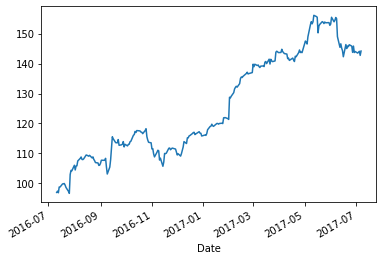

In [ ]:
df.Close.plot()

# Resampling:

This is useful for plotting because it groups the data. if you plot straight from the df it will plot every data point, e.g the line above is very granular. 

In [ ]:
df.Close.resample('M').mean()

#specify close column, resample it based on 'M' (month), and find mean

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

In [ ]:
%matplotlib inline #import matplotlib to .plot() the series;

df.Close.resample('M').mean().plot()


UsageError: unrecognized arguments: #import matplotlib to .plot() the series;


Frequencies are called offset aliases, string aliases for time periods:
Offset aliases
A number of string aliases are given to useful common time series frequencies. We will refer to these aliases as offset aliases.



B - business day frequency

C -custom business day frequency

D - calendar day frequency

W - weekly frequency

M - month end frequency

SM - semi-month end frequency (15th and end of month)

BM -business month end frequency

CBM - custom business month end frequency

MS - month start frequency

SMS - semi-month start frequency (1st and 15th)

BMS - business month start frequency

CBMS - custom business month start frequency

Q - quarter end frequency

BQ - business quarter end frequency

QS - quarter start frequency

BQS - business quarter start frequency

A, Y year end frequency

BA, BY business year end frequency

AS, YS - year start frequency

BAS, BYS - business year start frequency

BH - business hour frequency

H - hourly frequency

T, min - minutely frequency

S - secondly frequency

L, ms - milliseconds

U, us - microseconds

N - nanoseconds

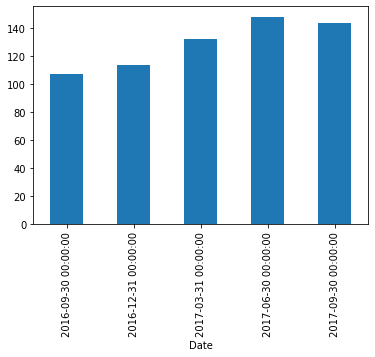

In [ ]:
df.Close.resample('Q').mean().plot(kind="bar") #quarterly bar plot